# **Problem Statement:** 
Developed a machine learning model to predict credit risk using various classification algorithms, including Support Vector
Machine (SVM), K-Nearest Neighbors (KNN), Decision Tree, Logistic Regression, Random Forest, AdaBoost, Gradient
Boosting, and XGBoost. The project involved handling an imbalanced dataset, performing feature engineering, and evaluating
the performance of each model based on accuracy, precision, recall, and AUC scores. The goal was to identify high-risk
customers and optimize loan approval processes for financial institutions.

<a id="contents_tabel"></a>   

<div style="background-color:#e9eef2; padding: 20px; border-radius: 15px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1);">
    <h1 style="font-size:24px; font-family:calibri; color:#102C42;"><b>📋 Table of Contents</b></h1>
    <ul style="font-size:20px; font-family:calibri; line-height: 1.5em;">
        <li><a href="#Initialization" style="text-decoration: none;">Step 0 | Setup and Initialization</a></li>
        <li><a href="#Analysis" style="text-decoration: none;">Step 1 | Dataset Analysis</a>
        <ul>
                <li><a href="#Centralizing" style="text-decoration: none;">Step 1.1 | Reading the dataset's information into a DataFrame.</a></li>
                <li><a href="#Centralizing" style="text-decoration: none;">Step 1.2 | Cheaking the shape of the dataset.</a></li>
                <li><a href="#Split" style="text-decoration: none;">Step 1.3 | Observing information of the Dataset.</a></li>
                <li><a href="#Augmentation" style="text-decoration: none;">Step 1.4 | Cheaking Non-null entries.</a></li>
                <li><a href="#Preprocessing" style="text-decoration: none;">Step 1.5 | cheaking Unique entries.</a></li>
            </ul>
        </li>
        <li><a href="#Preparation" style="text-decoration: none;">Step 2 | Dataset Preparation and Feature Engineering</a>
            <ul>
                <li><a href="#Centralizing" style="text-decoration: none;">Step 2.1 | Handelling Duplicate entries.</a></li>
                <li><a href="#Centralizing" style="text-decoration: none;">Step 2.2 | Treatment On Numerical feature.</a></li>
                <li><a href="#Split" style="text-decoration: none;">Step 2.3 | Treatment On Categorical feature.</a></li>
                <li><a href="#Augmentation" style="text-decoration: none;">Step 2.4 | Scalling the features through 'Stander Scaler'.</a></li>
                <li><a href="#Preprocessing" style="text-decoration: none;">Step 2.5 | Finalize the dataset.</a></li>
            </ul>
        </li>
        <li><a href="#Model" style="text-decoration: none;">Step 3 | Balancing The Dataset</a>
            <ul>
                <li><a href="#Centralizing" style="text-decoration: none;">Step 3.1 | Cheaking the Balances.</a></li>
                <li><a href="#Centralizing" style="text-decoration: none;">Step 3.2 | Split the dataframe into data and its label.</a></li>
                <li><a href="#Split" style="text-decoration: none;">Step 3.3 | Balance the Dataset using SMOTE.</a></li> 
            </ul>
        </li>
        <li><a href="#Train" style="text-decoration: none;">Step 4 | Model Building and Evaluation</a>
            <ul>
                <li><a href="#Centralizing" style="text-decoration: none;">Step 4.1 | Spliting the data into train test.</a></li>
                <li><a href="#Centralizing" style="text-decoration: none;">Step 4.2 | Defining all the Models.</a></li>
                <li><a href="#Split" style="text-decoration: none;">Step 4.3 | Training and Evaluating each model.</a></li> 
            </ul>
        </li>
        <li><a href="#Performance" style="text-decoration: none;">Step 5 | Feature Exploration</a></li>
        <!-- <li><a href="#Save" style="text-decoration: none;">Step 7 | Saving the Model for Deployment</a></li> -->
    </ul>
</div>


# Step-0 | Setup and Initialization
### Importing all the required Libraries:

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score,f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# Step 1 | Dataset Analysis

### 1.1 - Reading the dataset:

In [3]:
credit_risk = pd.read_csv(r'D:\Data Science\Own_Preparation\Own_Project\credit_risk_prediction\credit_risk_dataset.csv')
credit_risk.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
credit_risk.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


# Features Description

### 1. `person_age` 
**Description**: Age of the individual applying for the loan.

### 2. `person_income`  
**Description**: Annual income of the individual.

### 3. `person_home_ownership`  
**Description**: Type of home ownership of the individual.
- **rent**: The individual is currently renting a property.
- **mortgage**: The individual has a mortgage on the property they own.
- **own**: The individual owns their home outright.
- **other**: Other categories of home ownership that may be specific to the dataset.

### 4. `person_emp_length`  
**Description**: Employment length of the individual in years.

### 5. `loan_intent`  
**Description**: The intent behind the loan application.
- **DEBTCONSOLIDATION**: The loan is intended for consolidating debt.
- **EDUCATION**: The loan is intended for educational purposes.
- **HOMEIMPROVEMENT**: The loan is intended for home improvement.
- **MEDICAL**: The loan is intended for medical expenses.
- **PERSONAL**: The loan is for personal use.
- **VENTURE**: The loan is intended for business ventures.

### 6. `loan_grade`  
**Description**: The grade assigned to the loan based on the borrower's creditworthiness.
- **A**: High creditworthiness, indicating low risk.
- **B**: Relatively low-risk but not as creditworthy as Grade A.
- **C**: Moderate creditworthiness.
- **D**: Higher risk compared to previous grades.
- **E**: Lower creditworthiness, indicating higher risk.
- **F**: Significant credit risk.
- **G**: Lowest creditworthiness, signifying the highest risk.

### 7. `loan_amnt`  
**Description**: The loan amount requested by the individual.

### 8. `loan_int_rate`  
**Description**: The interest rate associated with the loan.

### 9. `loan_status`  
**Description**: The status of the loan.
- **0**: Non-default — The borrower successfully repaid the loan without default.
- **1**: Default — The borrower failed to repay the loan as agreed, leading to default.

### 10. `loan_percent_income`  
**Description**: The percentage of the borrower's income represented by the loan amount.

### 11. `cb_person_default_on_file`  
**Description**: Whether the individual has a history of default on their credit record.
- **Y**: The individual has a history of defaults.
- **N**: The individual does not have a history of defaults.

### 12. `cb_person_cred_hist_length`  
**Description**: The length of the individual's credit history.

### 1.2 - shape of the dataset:

In [5]:
credit_risk.shape

(32581, 12)

### 1.3 - Information about the dataset:

In [6]:
credit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


### obs:
1. Dtype: It has 8 numerical feature(5 of them are 'int' type and 3 of them 'float' type) and 4 of them are categorical(type: object).
2. Non-null: Here all entries of all the features are Non-null except some entries of two features('person_emp_length','loan_int_rate') takes Null value.

### 1.4 - Counting non-null entries:

In [7]:
credit_risk.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

### 1.5 - Cheaking unique entries:

In [8]:
credit_risk.nunique()

person_age                      58
person_income                 4295
person_home_ownership            4
person_emp_length               36
loan_intent                      6
loan_grade                       7
loan_amnt                      753
loan_int_rate                  348
loan_status                      2
loan_percent_income             77
cb_person_default_on_file        2
cb_person_cred_hist_length      29
dtype: int64

# Step-2: Data Preprocessing and Feature Engineering:

### 2.1 - Identifying and Handling Duplicate entries:

In [9]:
# make a copy for safety:
credit_risk_copy = credit_risk.copy()

In [10]:
credit_risk.duplicated().sum()

165

In [11]:
credit_risk.shape

(32581, 12)

In [12]:
credit_risk.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [13]:
credit_risk.drop_duplicates(inplace=True)
credit_risk.reset_index(drop=True,inplace=True) # reseting the indexes

no of entries after removing duplicates = 32581 - 165 = 32416

In [14]:
credit_risk.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32411,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32412,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32413,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32414,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32415,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [15]:
credit_risk.shape

(32416, 12)

### 2.2 - Treatment on Numerical features:

2.2.1 -  Identifying, Visualizing and Handling Outliers of the Numerical features:

In [16]:
credit_risk_numeric = credit_risk.select_dtypes(include=['int64', 'float64'])

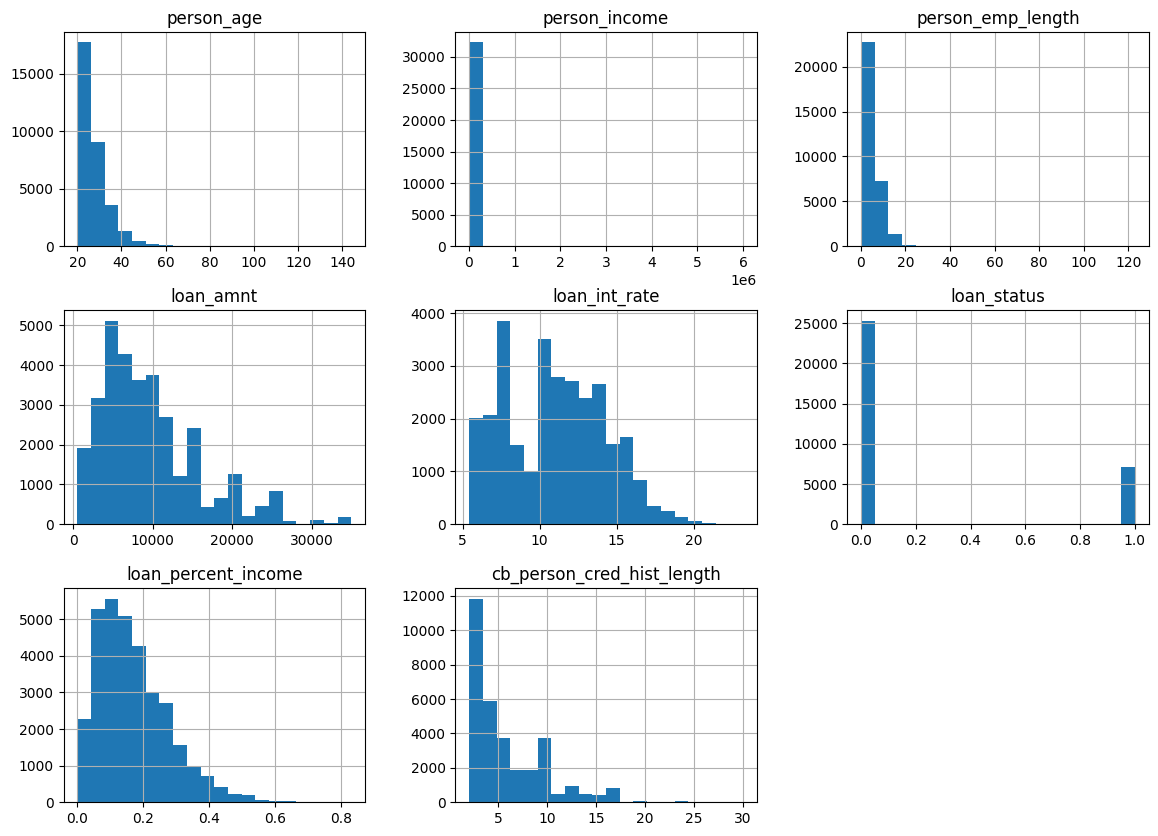

In [17]:
# Visualize distributions of numerical features
credit_risk_numeric.hist(bins=20, figsize=(14, 10))
plt.show()

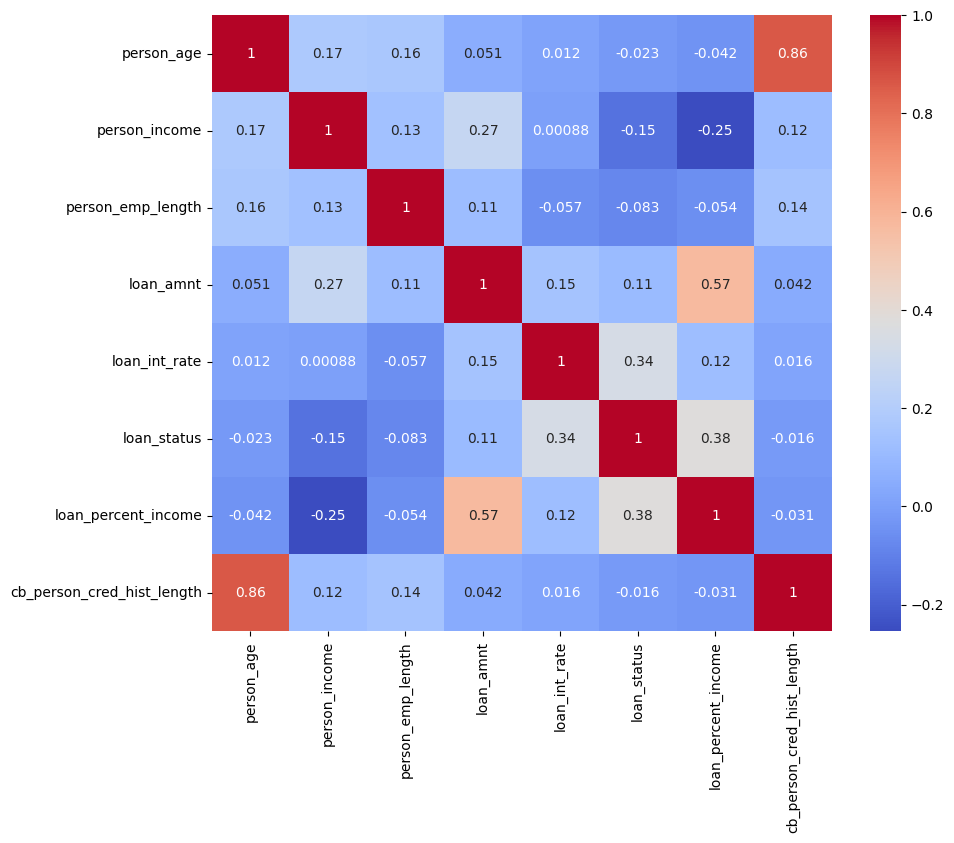

In [18]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(credit_risk_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()

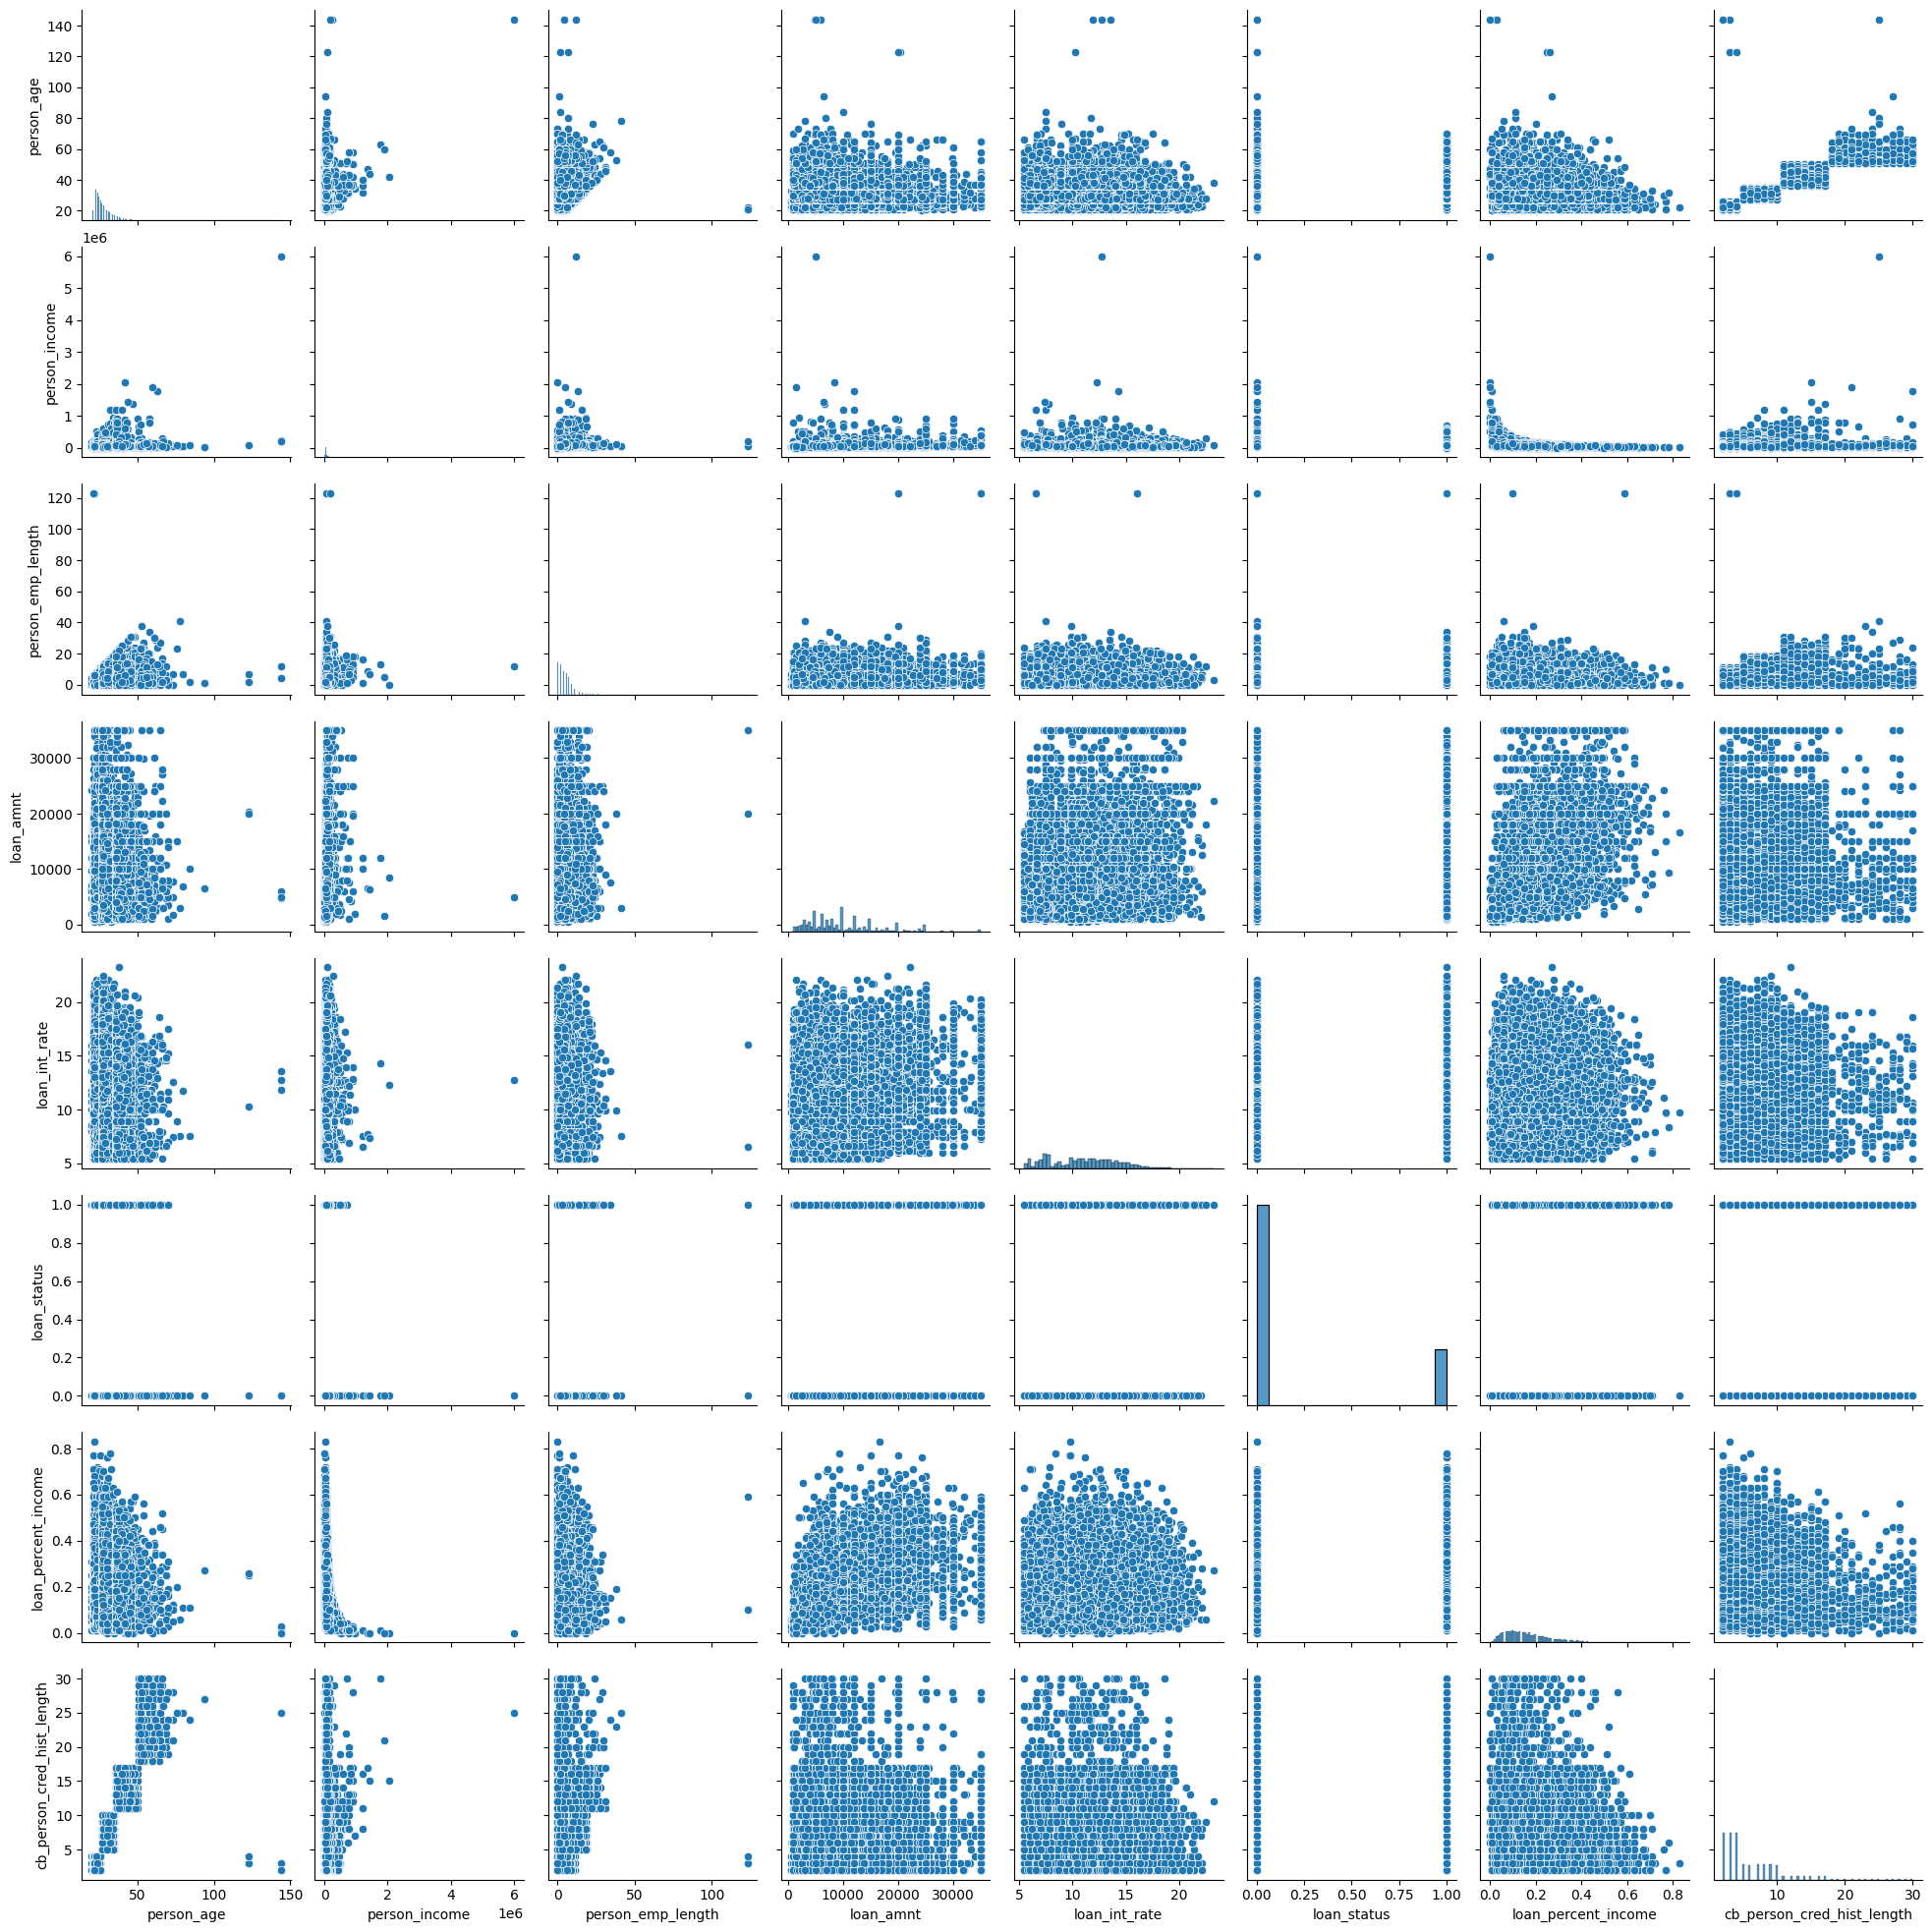

In [19]:
sns.pairplot(data = credit_risk_numeric)

In [20]:
credit_risk_numeric.tail()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
32411,57,53000,1.0,5800,13.16,0,0.11,30
32412,54,120000,4.0,17625,7.49,0,0.15,19
32413,65,76000,3.0,35000,10.99,1,0.46,28
32414,56,150000,5.0,15000,11.48,0,0.10,26
32415,66,42000,2.0,6475,9.99,0,0.15,30


In [21]:
credit_risk.describe() # it gives the statistics of the numeric column

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32416.000000,3.241600e+04,31529.00000,32416.000000,29321.000000,32416.000000,32416.000000,32416.000000
mean,27.747008,6.609164e+04,4.79051,9593.845632,11.017265,0.218688,0.170250,5.811297
std,6.354100,6.201558e+04,4.14549,6322.730241,3.241680,0.413363,0.106812,4.059030
min,20.000000,4.000000e+03,0.00000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.854200e+04,2.00000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.00000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.921800e+04,7.00000,12250.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.00000,35000.000000,23.220000,1.000000,0.830000,30.000000


here, we notice that persons max age is 144 and persons employee length 123,which is in general not possible. At first we fix that!!

Removing the outliers of the feature 'person_age':

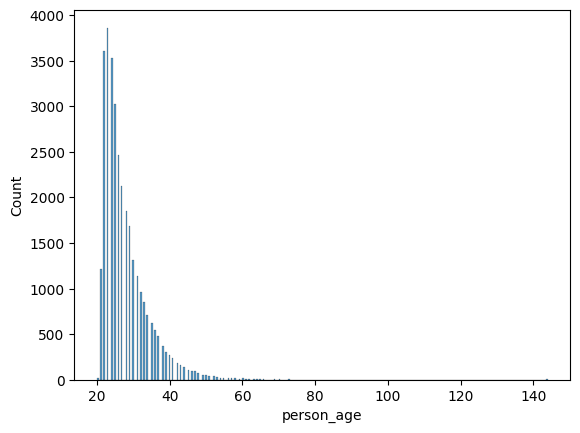

In [22]:
sns.histplot(data= credit_risk_numeric, x='person_age')
plt.show()

In [23]:
credit_risk.pivot_table(index='person_age',columns='loan_status',values='person_income',aggfunc='count').reset_index().sort_values(by='person_age',ascending=False).head(7)

loan_status,person_age,0,1
57,144,3.0,NaN
56,123,2.0,NaN
55,94,1.0,NaN
54,84,1.0,NaN
53,80,1.0,NaN
52,78,1.0,NaN
51,76,1.0,NaN


Here, we consider the outliers for 'person_age' is > 80 . since, there are 6 enteies satisfy that so we remove those.

In [24]:
cr_age_rmvd = credit_risk[credit_risk['person_age'] <= 80]
cr_age_rmvd.reset_index(drop=True,inplace=True) # reseting the indexes

In [25]:
print(cr_age_rmvd.shape)
cr_age_rmvd.tail()

(32409, 12)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32404,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32405,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32406,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32407,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32408,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [26]:
cr_age_rmvd.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32409.000000,3.240900e+04,31522.000000,32409.000000,29316.000000,32409.000000,32409.000000,32409.000000
mean,27.726588,6.589836e+04,4.790559,9593.674597,11.017237,0.218736,0.170258,5.809837
std,6.191834,5.252179e+04,4.145613,6322.701056,3.241836,0.413395,0.106809,4.054975
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12250.000000,13.472500,0.000000,0.230000,8.000000
max,80.000000,2.039784e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


Removing the outliers of the feature 'person_emp_length':

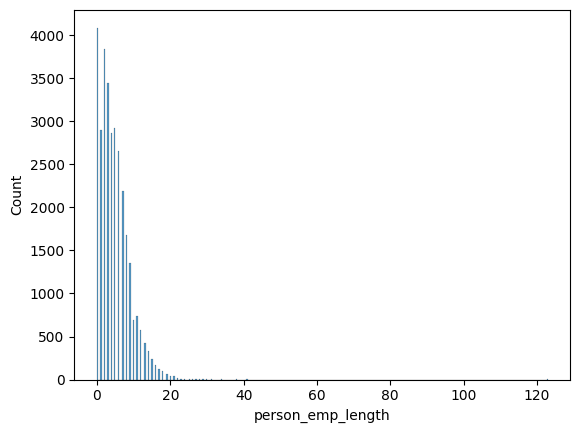

In [27]:
sns.histplot(data= credit_risk_numeric, x='person_emp_length')
plt.show()

In [28]:
cr_age_rmvd.pivot_table(index='person_emp_length',columns='loan_status',values='person_income',aggfunc='count').reset_index().sort_values(by='person_emp_length',ascending=False).head(7)

loan_status,person_emp_length,0,1
35,123.0,1.0,1.0
34,41.0,1.0,NaN
33,38.0,1.0,NaN
32,34.0,NaN,1.0
31,31.0,4.0,NaN
30,30.0,1.0,1.0
29,29.0,NaN,1.0


Here, we consider the outliers for 'person_emp_length' is > 47 as in general a person employee length should be less than (65-18) = 47 . since, there are 2 enteies satisfy that so we remove those.

In [29]:
cr_age_rmvd.shape

(32409, 12)

In [30]:
cr_eml_rmvd_outliers = cr_age_rmvd[cr_age_rmvd['person_emp_length'] > 47]
print(cr_eml_rmvd_outliers.shape)

(2, 12)


In [31]:
cr_eml_rmvd = cr_age_rmvd[~cr_age_rmvd['person_emp_length'].isin(cr_eml_rmvd_outliers['person_emp_length'])]
cr_eml_rmvd.reset_index(drop=True,inplace=True)
print(cr_eml_rmvd.shape)
cr_eml_rmvd.tail()

(32407, 12)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32402,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32403,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32404,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32405,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32406,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [32]:
cr_eml_rmvd.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32407.000000,3.240700e+04,31520.000000,32407.000000,29314.000000,32407.000000,32407.000000,32407.000000
mean,27.726973,6.589468e+04,4.783058,9592.569507,11.017219,0.218718,0.170247,5.809979
std,6.191831,5.251873e+04,4.037384,6321.056427,3.241709,0.413383,0.106786,4.055058
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12250.000000,13.470000,0.000000,0.230000,8.000000
max,80.000000,2.039784e+06,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


2.2.2 - handelling Null entries:

In [33]:
cr_eml_rmvd.isnull().sum()    # Null value cheak

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3093
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

here, 'person_emp_length' and 'loan_int_rate' columns has null entres !
so, we replace this null values by their mean. 

Replacing all the Null entries of 'person_emp_length' by its mean = 4.783058	

In [34]:
cr_data = cr_eml_rmvd.copy()
cr_data.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32402,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32403,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32404,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32405,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32406,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [35]:
cr_data.fillna({'person_emp_length':cr_data['person_emp_length'].mean()},inplace=True)

Replacing all the Null entries of 'loan_int_rate' by its mean = 11.017219

In [36]:
cr_data.fillna({'loan_int_rate':cr_data['loan_int_rate'].mean()},inplace=True)

In [37]:
cr_data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [38]:
cr_data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32407.000000,3.240700e+04,32407.000000,32407.000000,32407.000000,32407.000000,32407.000000,32407.000000
mean,27.726973,6.589468e+04,4.783058,9592.569507,11.017219,0.218718,0.170247,5.809979
std,6.191831,5.251873e+04,3.981746,6321.056427,3.083127,0.413383,0.106786,4.055058
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,11.017219,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12250.000000,13.110000,0.000000,0.230000,8.000000
max,80.000000,2.039784e+06,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


### 2.3 - Treatment on categorical features:

In [39]:
credit_risk_categorical = cr_data

In [40]:
credit_risk_categorical.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32402,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32403,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32404,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32405,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32406,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [41]:
credit_risk_categorical.shape

(32407, 12)

2.3.1 - Visualizing and Handelling the categorical data:

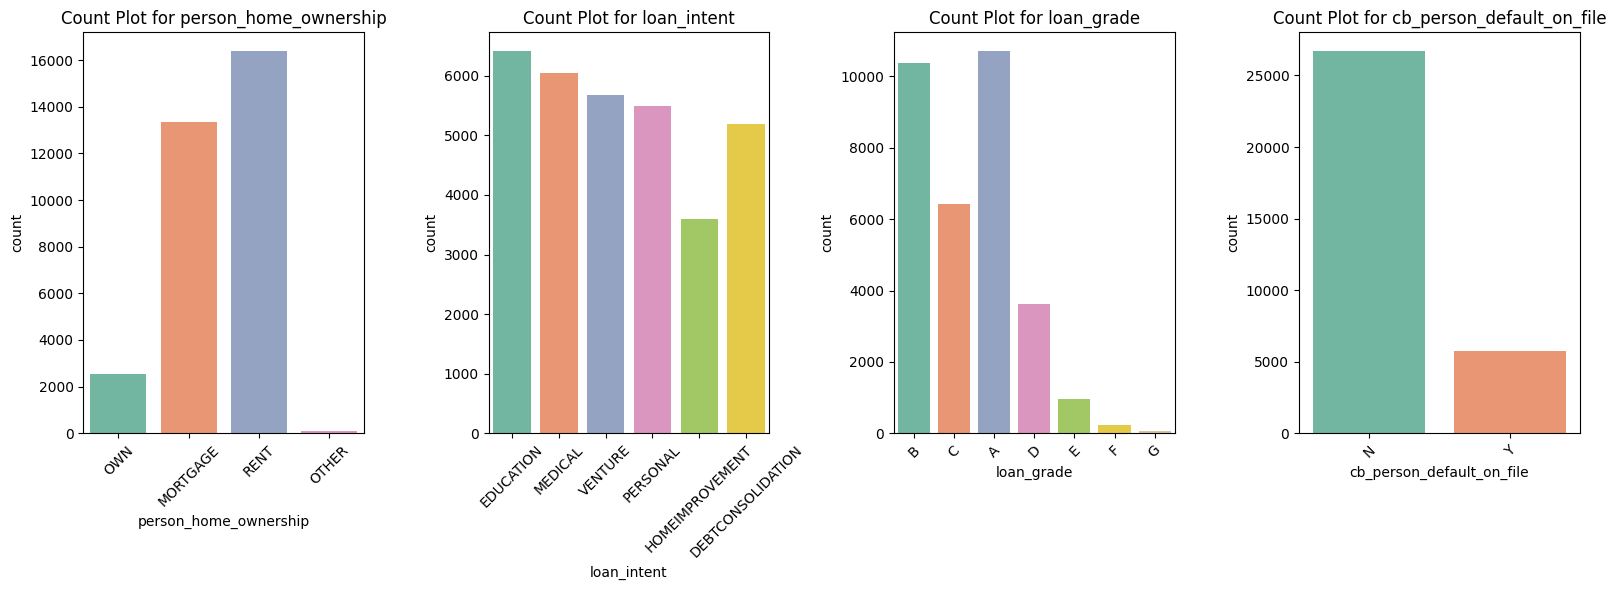

In [42]:
categorical_columns = ["person_home_ownership", "loan_intent", "loan_grade", "cb_person_default_on_file"]

# Set the number of columns for side-by-side plots (4 columns in this case)
fig, axes = plt.subplots(1, len(categorical_columns), figsize=(16, 6))  # 1 row, len(columns) side-by-side plots

for ax, col in zip(axes, categorical_columns):              # Loop through each column and plot on each subplot
    sns.countplot(data=cr_data, x=col, hue=col, dodge=False, palette="Set2", ax=ax, legend=False)
    ax.set_title(f'Count Plot for {col}')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis tick labels

plt.tight_layout()  # Adjust spacing to fit plots nicely
plt.show()

In [43]:
# cheaking the classes of the categorical feature 'loan_grade':
cr_data.groupby('loan_grade').count()['person_age']

loan_grade
A    10701
B    10384
C     6435
D     3619
E      963
F      241
G       64
Name: person_age, dtype: int64

In [44]:
# drop the column'loan_grade':
''' since, i does not understand the column 'loan_grade' and also the dataset owner does not give any information about that!!
so, i drop this features of the dataset!! '''
# cr_data_copy = cr_data.drop('loan_grade',axis=1)

" since, i does not understand the column 'loan_grade' and also the dataset owner does not give any information about that!!\nso, i drop this features of the dataset!! "

2.3.2 - Feature Engineering:

Transforming other categorical data into corresponding numerical data:

For 'person_home_ownership' : (One-hot encoding)

In [45]:
# cheaking the classes of the categorical feature 'person_home_ownership':
cr_data.groupby('person_home_ownership').count()['person_age']

person_home_ownership
MORTGAGE    13365
OTHER         106
OWN          2563
RENT        16373
Name: person_age, dtype: int64

In [46]:
# one-hot encoding
person_home_ownership = pd.get_dummies(cr_data['person_home_ownership'],drop_first=True).astype(int) # drop_first gives the default value to 'MORTGAGE'
person_home_ownership.head()

,OTHER,OWN,RENT
0,0,1,0
1,0,0,0
2,0,0,1
3,0,0,1
4,0,1,0


For 'loan_intent' :(One-hot encoding)

In [47]:
# cheaking the classes of the categorical feature 'loan_intent':
cr_data.groupby('loan_intent').count()['person_age']

loan_intent
DEBTCONSOLIDATION    5189
EDUCATION            6409
HOMEIMPROVEMENT      3594
MEDICAL              6041
PERSONAL             5495
VENTURE              5679
Name: person_age, dtype: int64

In [48]:
# one-hot encoding
loan_intent = pd.get_dummies(cr_data['loan_intent'],drop_first=True).astype(int) # drop_first gives the default value to 'DEBTCONSOLIDATION'
loan_intent.head()

,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,1,0,0,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,0,1


For 'loan_grade' :(One-hot encoding)

In [49]:
# cheaking the classes of the categorical feature 'cb_person_default_on_file':
cr_data.groupby('loan_grade').count()['person_age']

loan_grade
A    10701
B    10384
C     6435
D     3619
E      963
F      241
G       64
Name: person_age, dtype: int64

In [50]:
# one-hot encoding
loan_grade = pd.get_dummies(cr_data['loan_grade'],drop_first=True).astype(int) # drop_first gives the default value to grade 'A'
loan_grade.head()

,B,C,D,E,F,G
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,0,0,0,0,0


For 'cb_person_default_on_file' : (binary encoding)

In [51]:
# cheaking the classes of the categorical feature 'cb_person_default_on_file':
cr_data.groupby('cb_person_default_on_file').count()['person_age']

cb_person_default_on_file
N    26678
Y     5729
Name: person_age, dtype: int64

In [52]:
# binary encoding
cr_data['cb_person_default_on_file_binary'] = np.where(cr_data['cb_person_default_on_file']=='Y',1,0)
cr_data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,cb_person_default_on_file_binary
0,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,0
1,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,0
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,0
3,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,1
4,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,0


### 2.4 - Scalling the features through Standard Scalar:
x - mean(x)/std(x)

storing all those features which are require to scale:

In [53]:
data_to_scale = cr_data.drop(['person_home_ownership','loan_intent','loan_status','cb_person_default_on_file','cb_person_default_on_file_binary','loan_grade'],axis=1)
data_to_scale.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,21,9600,5.0,1000,11.14,0.10,2
1,25,9600,1.0,5500,12.87,0.57,3
2,23,65500,4.0,35000,15.23,0.53,2
3,24,54400,8.0,35000,14.27,0.55,4
4,21,9900,2.0,2500,7.14,0.25,2


In [54]:
scalar = StandardScaler()

In [55]:
scaled_data = scalar.fit_transform(data_to_scale)
scaled_data

array([[-1.08644378, -1.07191372,  0.05448488, ...,  0.03982423,
        -0.65783664, -0.93957678],
       [-0.44042136, -1.07191372, -0.95011497, ...,  0.60095147,
         3.74354471, -0.69296736],
       [-0.76343257, -0.00751511, -0.19666508, ...,  1.36641985,
         3.36895906, -0.93957678],
       ...,
       [ 6.01980286,  0.19241665, -0.44781505, ..., -0.00882842,
         2.71343418,  5.47226803],
       [ 4.56625241,  1.60145953,  0.05448488, ...,  0.15010357,
        -0.65783664,  4.9790492 ],
       [ 6.18130847, -0.45498143, -0.69896501, ..., -0.33317943,
        -0.18960458,  5.96548687]])

In [56]:
df_scaled_data = pd.DataFrame(scaled_data,columns=['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'])
df_scaled_data.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,-1.086444,-1.071914,0.054485,-1.359378,0.039824,-0.657837,-0.939577
1,-0.440421,-1.071914,-0.950115,-0.647460,0.600951,3.743545,-0.692967
2,-0.763433,-0.007515,-0.196665,4.019553,1.366420,3.368959,-0.939577
3,-0.601927,-0.218872,0.807935,4.019553,1.055043,3.556252,-0.446358
4,-1.086444,-1.066201,-0.698965,-1.122072,-1.257580,0.746860,-0.939577


### 2.5 - combined all required features together:

1. df_scaled_data = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt','loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']  (7-column)
2. person_home_ownership = [OTHER,	OWN, RENT]  (3-column)
3. loan_intent = [EDUCATION, HOMEIMPROVEMENT, MEDICAL, PERSONAL, VENTURE]  (5-column)
4. loan_grade = [B, C, D, E, F, G] (6-column)
5. cr_data = ['cb_person_default_on_file_binary', 'loan_status']   (2-column)
*Thus*, data contain = (7+3+5+6+2) = 23 columns

In [57]:
cr_data['cb_person_default_on_file'] = cr_data['cb_person_default_on_file_binary']

In [58]:
dataset = pd.concat([df_scaled_data, person_home_ownership, loan_intent, loan_grade, cr_data['cb_person_default_on_file'], cr_data['loan_status']], axis=1)
dataset.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,OTHER,OWN,RENT,...,PERSONAL,VENTURE,B,C,D,E,F,G,cb_person_default_on_file,loan_status
0,-1.086444,-1.071914,0.054485,-1.359378,0.039824,-0.657837,-0.939577,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,-0.440421,-1.071914,-0.950115,-0.647460,0.600951,3.743545,-0.692967,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,-0.763433,-0.007515,-0.196665,4.019553,1.366420,3.368959,-0.939577,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,-0.601927,-0.218872,0.807935,4.019553,1.055043,3.556252,-0.446358,0,0,1,...,0,0,0,1,0,0,0,0,1,1
4,-1.086444,-1.066201,-0.698965,-1.122072,-1.257580,0.746860,-0.939577,0,1,0,...,0,1,0,0,0,0,0,0,0,1


In [59]:
dataset.shape

(32407, 23)

# Step-3: Balancing the Dataset:

### 3.1 - Cheaking the balance of the Dataset

In [60]:
# data banlace cheak (ratio of persons who gets loan and who doesnot):
dataset.groupby('loan_status').count()['person_age']

loan_status
0    25319
1     7088
Name: person_age, dtype: int64

In [61]:
# ratio:
7088/(25319+7088)

0.21871817817138273

so, in this dataset loan status ratio(not loan: loan) is = 78:22 , 
Thus we cheak that there is a data imbalance which we have to solve.

### 3.2 - Spliting the dataset into data and it's corresponding labels:

In [62]:
# Split the data into features and target
data = dataset.drop('loan_status', axis=1)
label = dataset['loan_status']

In [63]:
display(data.shape)
display(label.shape)

(32407, 22)

(32407,)

### 3.3 - Balance the data using SMOTE(Synthetic Minority Over-Sampling Technique):

In [64]:
smote = SMOTE()

In [65]:
x_smote, y_smote = smote.fit_resample(data,label)

In [66]:
display(x_smote.shape)
display(y_smote.shape)

(50638, 22)

(50638,)

In [67]:
y_smote.tail()

50633    1
50634    1
50635    1
50636    1
50637    1
Name: loan_status, dtype: int64

In [68]:
# Rechaking the data banlace:
df = pd.concat([x_smote, y_smote],axis=1)
df.groupby('loan_status').count()['person_age']

loan_status
0    25319
1    25319
Name: person_age, dtype: int64

# Step-4: Model Building

### 4.1 - Spliting the data into train and test

In [69]:
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

In [70]:
display(X_train.shape)
display(y_train.shape)
display(X_test.shape)
display(X_test.shape)

(40510, 22)

(40510,)

(10128, 22)

(10128, 22)

### 4.2 - List of models

In [71]:
svm = SVC(probability=True)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
lr = LogisticRegression()
rf = RandomForestClassifier()
adb = AdaBoostClassifier()
gb = GradientBoostingClassifier()
xgb = XGBClassifier()

In [72]:
models = {
    'Support Vector Machine': svm,
    'K-Nearest Neighbors': knn,
    'Decision Tree': dt,
    'Logistic Regression': lr,
    'Random Forest': rf,
    'AdaBoost': adb,
    'Gradient Boosting': gb,
    'XGBoost': xgb,
}

### 4.3 - Train and evaluate each model:

In [73]:
for name, model in models.items():
    print(f'train the model {name}')
    model.fit(X_train, y_train)

In [74]:
model_results = {}
for name, model in models.items():

    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else y_pred
    
    model_results[name] = {
        'Training Accuracy': model.score(X_train,y_train),
        'Testing Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_pred_proba)
    }
# Convert results to DataFrame
results_df = pd.DataFrame(model_results).T
print(results_df)

                        Training Accuracy  Testing Accuracy  Precision  \
Support Vector Machine           0.866008          0.859005   0.921156   
K-Nearest Neighbors              0.920686          0.879542   0.839534   
Decision Tree                    1.000000          0.899487   0.896498   
Logistic Regression              0.797778          0.792753   0.809583   
Random Forest                    1.000000          0.943523   0.975280   
AdaBoost                         0.853567          0.856438   0.880977   
Gradient Boosting                0.894273          0.891094   0.934136   
XGBoost                          0.967119          0.950434   0.984723   

                          Recall  F1 Score   ROC AUC  
Support Vector Machine  0.785644  0.848020  0.930194  
K-Nearest Neighbors     0.938868  0.886427  0.953078  
Decision Tree           0.903569  0.900020  0.899481  
Logistic Regression     0.766318  0.787357  0.875367  
Random Forest           0.910274  0.941656  0.986591  
Ada

### Conclusion:
Here are the top 3 performers with brief explanations:
1. **XGBoost**
> Accuracy: 95%
> Precision: 98.5%
> ROC AUC: 98.5%
> Reason: Highest ROC AUC, indicating excellent ability to distinguish between positive and negative classes, making it very reliable.

2. **Random Forest**
> Accuracy: 94.4%
> Precision: 97.5%
> ROC AUC: 98.7%
> Reason: Strong overall performance with high precision and balanced recall, suitable for diverse datasets,although there is an overfitting for this model as trining accuracy = 100% where as testing Accuracy: 94.4%

3. **Gradient Boosting**
> Accuracy: 89.1%
> Precision: 93.4%
> ROC AUC: 95.8%
> Reason: Effective at capturing complex patterns, with good balance across all metrics.

# Step-5: Feature Exploration

In [ ]:
from sklearn.inspection import permutation_importance

# Initialize a dictionary to store feature importances
feature_importances = {}

# Loop through each model
for name, model in models.items():

    # Try to get feature importance or coefficients
    if hasattr(model, 'feature_importances_'): 
        # For tree-based models like Decision Tree, Random Forest, XGBoost
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        # For models like Logistic Regression, linear SVM (take absolute value of coefficients)
        importances = abs(model.coef_[0])
    else:
        # For models without native feature importances, use permutation importance
        result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
        importances = result.importances_mean

    # Store the feature importances in the dictionary
    feature_importances[name] = importances

# Convert the feature importances to a DataFrame
feature_importances_df = pd.DataFrame(feature_importances, index=X_train.columns)

# Display the DataFrame
print(feature_importances_df)
